# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
df1=pd.read_csv('5_a.csv')
df1.shape
def confusion_matrix(df,threshold=0.5):
    '''Given Dataframe,this function computes values for confusion matrix'''
    
    df['y^']=np.where(df['proba']<threshold,0,1)  #np.where(condition,ifTrue:Value,else:Value)
    #Taken y^ as a binary class ,same as y to compare values
    #...(confusion matrix cant process probability scores)
    
    TP=df1['y'][(df['y']==1)&(df['y^']==1)].count()
    FP=df1['y'][(df['y']==0)&(df['y^']==1)].count()
    FN=df1['y'][(df['y']==1)&(df['y^']==0)].count()
    TN=df1['y'][(df['y']==0)&(df['y^']==0)].count()
    
    return TP,FP,FN,TN


def terms(TP,FP,FN,TN):
    '''Given Values for Confusion Matrix this function computes terms to be used in calculation for AUC,ROC'''
    
    FPR=FP/(FP+TN)
    CorrectlyClassified=TP+TN
    NumberOfPoints=TP+TN+FP+FN #len(df1)
    
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    
    TPR=recall
    FPR=FP/(FP+TN)
    
    F1=(2*(precision*recall))/(precision+recall)
    Accuracy=CorrectlyClassified/NumberOfPoints
    
    return precision,recall,F1,Accuracy,TPR,FPR

In [3]:
df1=df1.sort_values(by='proba',ascending=False)
def AUC(df):
    '''This function calculates AUC score given DataFrame'''
    global TPR,FPR
    
    TPR,FPR=[],[]
    for threshold in tqdm(df['proba']):
        TP,FP,FN,TN=confusion_matrix(df,threshold)
        precision,recall,F1,Accuracy,TPRate,FPRate=terms(TP,FP,FN,TN)
        
        TPR.append(TPRate)
        FPR.append(FPRate)
        
        df.drop(columns='y^')
    AUC=np.trapz(TPR,FPR)
    
    return AUC

100%|███████████████████████████████████████████████████████████████████████████| 10100/10100 [00:22<00:00, 439.82it/s]


AUC=0.48829900000000004



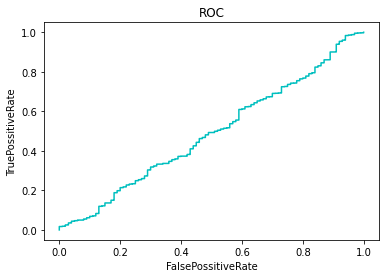

In [4]:
print(f"AUC={AUC(df1)}\n")

plt.plot(FPR,TPR,color='c')
plt.title('ROC')
plt.xlabel("FalsePossitiveRate")
plt.ylabel("TruePossitiveRate")
plt.show()



## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [5]:
df2=pd.read_csv('5_b.csv')
df2.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


100%|███████████████████████████████████████████████████████████████████████████| 10100/10100 [00:42<00:00, 238.70it/s]


AUC: 0.9377570000000001


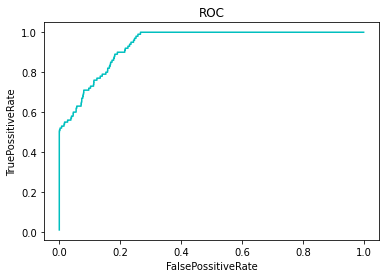

In [6]:
df2=df2.sort_values(by='proba',ascending=False)
print("AUC:",AUC(df2))

plt.plot(FPR,TPR,color='c')
plt.title('ROC')
plt.xlabel("FalsePossitiveRate")
plt.ylabel("TruePossitiveRate")
plt.show()

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [7]:
df3=pd.read_csv('5_c.csv')
df3.rename(columns={'prob':'proba'},inplace=True)
df3=df3.sort_values(by='proba',ascending=False)
df3.head()

,y,proba
2634,1,0.957747
2548,1,0.951437
2447,1,0.948638
2788,1,0.944094
2456,1,0.941113


In [8]:
def confusion_matrix(df,threshold):
    '''Given Dataframe,this function computes values for confusion matrix'''
    
    df['y^']=np.where(df['proba']<threshold,0,1) #np.where(condition,ifTrue:Value,else:Value)
    #confusion matrix cant process probability scores
    TP=df['y'][(df['y']==1)&(df['y^']==1)].count()
    FP=df['y'][(df['y']==0)&(df['y^']==1)].count()
    FN=df['y'][(df['y']==1)&(df['y^']==0)].count()
    TN=df['y'][(df['y']==0)&(df['y^']==0)].count()
    return TP,FP,FN,TN


def terms(TP,FP,FN,TN):
    '''Given Values for Confusion Matrix this function computes terms to be used in calculation for AUC,ROC'''
    
    FPR=FP/(FP+TN)
    CorrectlyClassified=TP+TN
    NumberOfPoints=TP+TN+FP+FN #len(df)
    
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    
    TPRate=recall
    FPRate=FP/(FP+TN)
    
    F1=(2*(precision*recall))/(precision+recall)
    Accuracy=CorrectlyClassified/NumberOfPoints
    
    return precision,recall,F1,Accuracy,TPRate,FPRate

In [9]:
def threshold(df):
    '''This function finds the best threshold with its value'''
    
    th={}
    for prob in tqdm(df['proba']):
        TP,FP,FN,TN=confusion_matrix(df,prob) #block1:calculating thresholds
        A=(500*FN)+(100*FP)
        th[prob]=A
       
    for k,v in th.items():
        if th[k]==min(th.values()): #block2:getting the best threshold with its value 
            threshold,value=k,v
            break
            
    return threshold,value

In [10]:
threshold,value=threshold(df3)
print(f"The best threshold is {threshold} with value of {value}")

100%|█████████████████████████████████████████████████████████████████████████████| 2852/2852 [00:05<00:00, 544.30it/s]


The best threshold is 0.2300390278970873 with value of 141000



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [11]:
df3=pd.read_csv('5_d.csv')
df3.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [12]:
def performance_metrics(df):
    '''This function calculates the performance metrics given dataframe (with actual and predicted values)'''
    
    actual=np.array(df['y'])
    predicted=np.array(df['pred'])
    
    error=np.subtract(actual,predicted)
    sq_error=np.square(error)
    sum_of_square_of_residual=sq_error.sum()
    total_sum_of_squares_of_errors=np.sum(np.square(np.subtract(actual,actual.mean())))
    R2_error=1-(sum_of_square_of_residual/total_sum_of_squares_of_errors)
    
    MSE=sq_error.mean()
    MAPE=np.mean(np.abs(error))/np.mean(actual)
   
    return MSE,MAPE,R2_error

In [13]:
MSE,MAPE,R2_error=performance_metrics(df3)
print(f"MSE:{MSE}\nMAPE:{MAPE}\nR2_error:{R2_error}")

MSE:177.16569974554707
MAPE:0.1291202994009687
R2_error:0.9563582786990937
